Name: Harshith Akkapelli

Task-6: Video Action Recognition

Dataset(Only three classes are taken due to computational resource constraints): [UCF Youtube Action Dataset](https://www.kaggle.com/datasets/pypiahmad/ucf-youtube-action-data-set)

### **Load the dataset**

In [ ]:
import zipfile
import os

# File path for the uploaded dataset
zip_file_path = '/content/Dataset_6.zip'
extract_folder_path = '/content/Dataset_6'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

# Listing the contents of the extracted folder
extracted_files = os.listdir(extract_folder_path)
extracted_files[:10], len(extracted_files)  # Displaying first 10 files and total count to get an idea


(['biking', 'readme.txt', 'basketball', 'diving'], 4)

In [ ]:
# Path to the readme.txt file
readme_file_path = os.path.join(extract_folder_path, 'readme.txt')

# Reading and displaying the contents of the readme.txt file
with open(readme_file_path, 'r') as file:
    readme_contents = file.read()

readme_contents


'UCF YOUTUBE ACTION DATASET\n\n========================================================================================================\n1. It contains 11 action categories: basketball shooting, biking/cycling, diving, golf swinging, \n   horseback riding, soccer juggling, swinging, tennis swinging, trampoline jumping, volleyball \n   spiking, and walking with a dog\n\n2. For each category, the videos are grouped into 25 groups each with more than 4 action clips.\n   The video clips in the same group may share some common characteristics, such as the same subject, \n   similar background, similar viewpoint, etc.\n\n3. The videos are in ms mpeg4 format. You need to install the right video codec (e.g. K-lite Codec Pack \n   contains a cellection of Codecs) to access them.\n\n\n4. Annotions are avilable in each folder in VIPER-GT XML format.\n\n5. If you need a reference for this dataset, please refer to paper: \n   \n   J. Liu, J. Luo and M. Shah, Recognizing realistic actions from video

### **EDA**

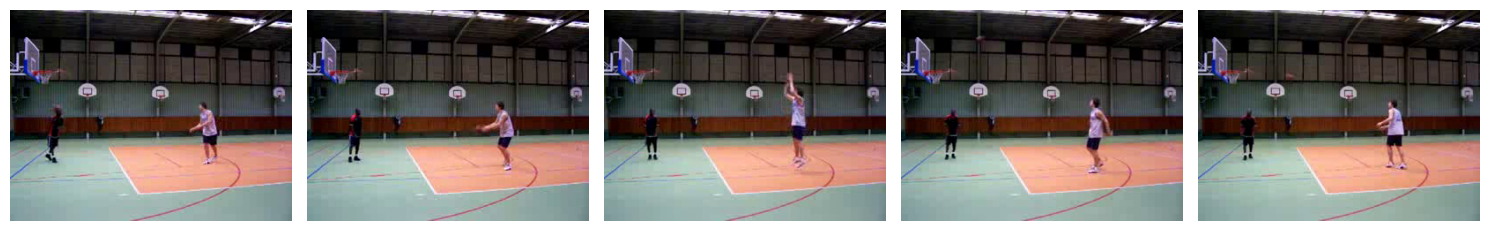

In [ ]:
import matplotlib.pyplot as plt
import cv2

def extract_frames(video_path, num_frames_to_extract=5):
    """
    Extracts a specified number of frames evenly from a given video file.

    :param video_path: Path to the video file.
    :param num_frames_to_extract: Number of frames to extract.
    :return: List of extracted frames as images.
    """
    frames = []
    cap = cv2.VideoCapture(video_path)

    # Total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    interval = total_frames // num_frames_to_extract

    for i in range(num_frames_to_extract):
        # Set the frame position of the video
        cap.set(cv2.CAP_PROP_POS_FRAMES, i * interval)
        ret, frame = cap.read()
        if ret:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert the frame to RGB
        else:
            break

    cap.release()
    return frames
basketball_folder_path = os.path.join(extract_folder_path, 'basketball')
video_group_path = os.path.join(basketball_folder_path, 'v_shooting_01')
video_file_path_avi = os.path.join(video_group_path, 'v_shooting_01_01.avi')

# Extracting frames from the video file
extracted_frames = extract_frames(video_file_path_avi)

# Displaying the extracted frames
fig, axes = plt.subplots(1, len(extracted_frames), figsize=(15, 5))
for ax, frame in zip(axes, extracted_frames):
    ax.imshow(frame)
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Path to a selected .avi video file for inspection
video_file_path_avi = os.path.join(video_group_path, 'v_shooting_01_01.avi')

# Using OpenCV to read the .avi video file and get some basic information
cap_avi = cv2.VideoCapture(video_file_path_avi)
frame_count_avi = int(cap_avi.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width_avi = int(cap_avi.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height_avi = int(cap_avi.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate_avi = cap_avi.get(cv2.CAP_PROP_FPS)

# Releasing the video capture object
cap_avi.release()

(video_file_path_avi, frame_count_avi, (frame_width_avi, frame_height_avi), frame_rate_avi)


('/content/Dataset_6/basketball/v_shooting_01/v_shooting_01_01.avi',
 108,
 (320, 240),
 29.97002997002997)

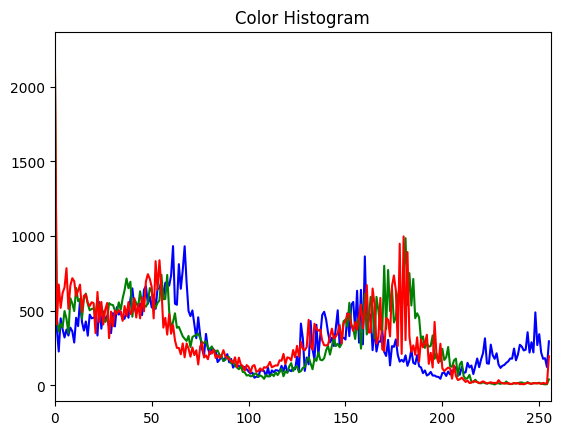

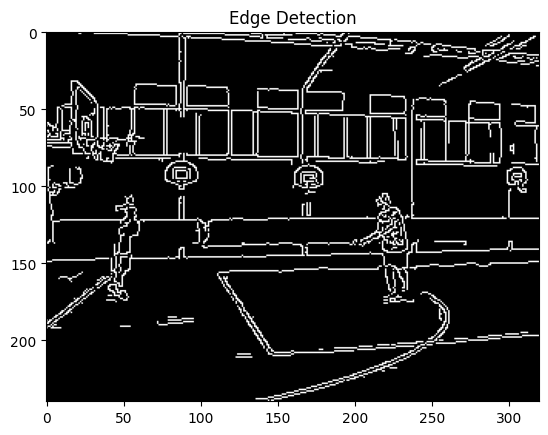

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def plot_color_histogram(frame):
    """
    Plot the color histogram for the given frame.

    :param frame: Image frame for which to plot the histogram.
    """
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([frame], [i], None, [256], [0, 256])
        plt.plot(histr, color=col)
        plt.xlim([0, 256])
    plt.title('Color Histogram')
    plt.show()

def plot_edge_detection(frame):
    """
    Apply and plot edge detection for the given frame.

    :param frame: Image frame for which to apply edge detection.
    """
    edges = cv2.Canny(frame, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.show()

# Selecting a frame for analysis
selected_frame = extracted_frames[0]

# Plotting color histogram for the selected frame
plot_color_histogram(selected_frame)

# Applying and plotting edge detection for the selected frame
plot_edge_detection(selected_frame)


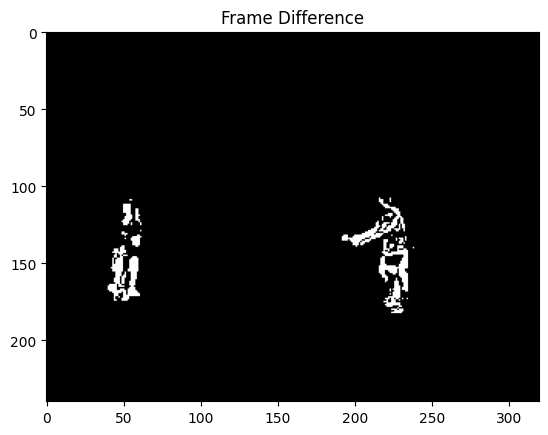

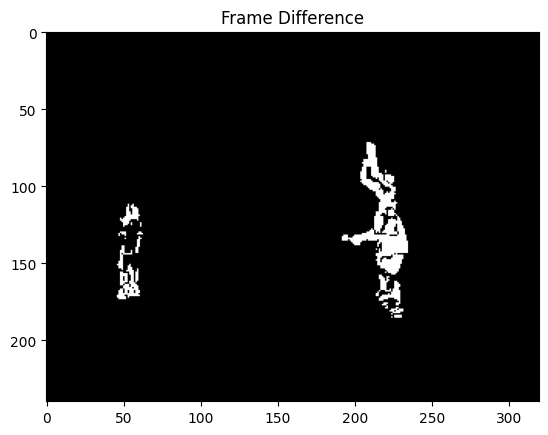

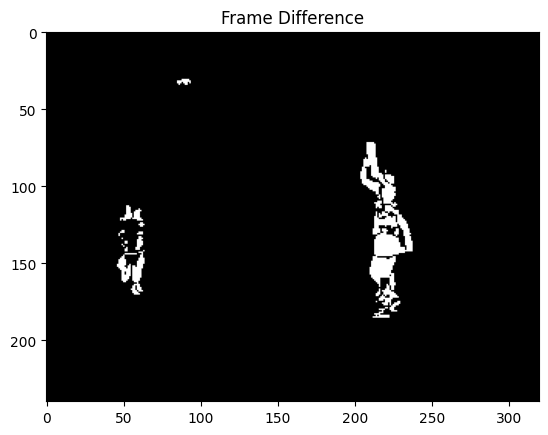

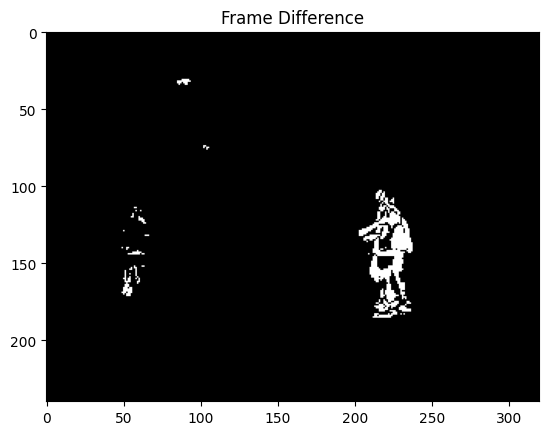

In [ ]:
def plot_frame_difference(frame1, frame2):
    """
    Compute and plot the frame difference between two frames.

    :param frame1: First image frame.
    :param frame2: Second image frame.
    """
    # Calculating the difference and converting it to a format suitable for display
    frame_diff = cv2.absdiff(frame1, frame2)
    gray_diff = cv2.cvtColor(frame_diff, cv2.COLOR_RGB2GRAY)
    _, diff_thresh = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

    plt.imshow(diff_thresh, cmap='gray')
    plt.title('Frame Difference')
    plt.show()

# Plotting frame difference for a few pairs of consecutive frames
for i in range(len(extracted_frames) - 1):
    plot_frame_difference(extracted_frames[i], extracted_frames[i + 1])


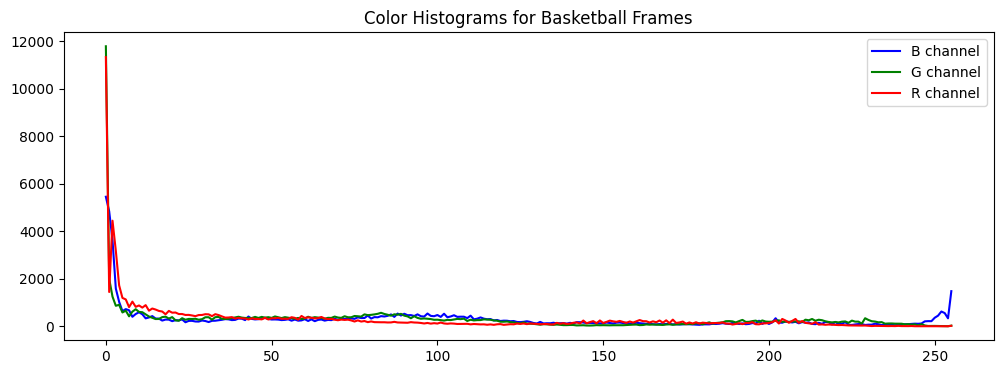

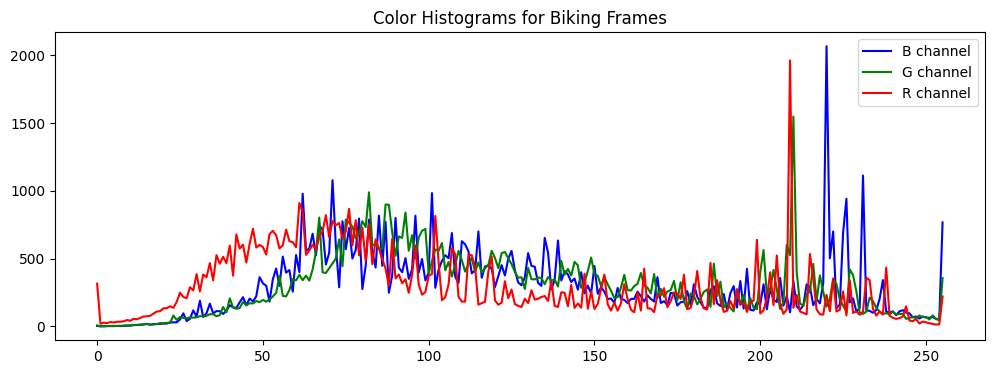

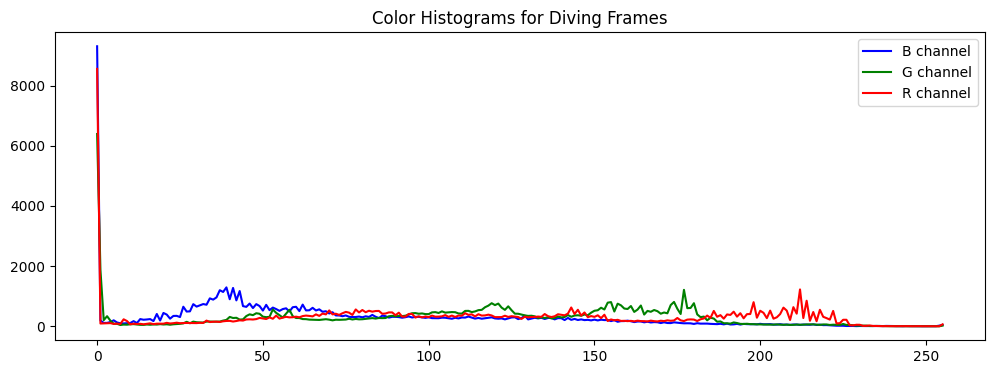

In [ ]:
from collections import defaultdict

# Function to compute color histograms for multiple frames
def compute_color_histograms(frames):
    """
    Compute color histograms for a list of frames.

    :param frames: List of image frames.
    :return: List of color histograms for the frames.
    """
    histograms = defaultdict(list)
    for frame in frames:
        for i, col in enumerate(('b', 'g', 'r')):
            hist = cv2.calcHist([frame], [i], None, [256], [0, 256]).flatten()
            histograms[col].append(hist)
    return histograms

# Function to extract a few frames from each action category
def extract_frames_from_categories(categories, num_frames_per_video=2, num_videos=2):
    """
    Extract a specified number of frames from a specified number of videos in each category.

    :param categories: List of categories to extract frames from.
    :param num_frames_per_video: Number of frames to extract from each video.
    :param num_videos: Number of videos to extract frames from in each category.
    :return: Dictionary of extracted frames categorized by action type.
    """
    category_frames = defaultdict(list)
    for category in categories:
        category_path = os.path.join(extract_folder_path, category)
        videos = [v for v in os.listdir(category_path) if os.path.isdir(os.path.join(category_path, v))]

        # Extract frames from the first few videos in each category
        for video in videos[:num_videos]:
            video_path = os.path.join(category_path, video, video + "_01.avi")  # Assuming a standard naming convention
            frames = extract_frames(video_path, num_frames_per_video)
            category_frames[category].extend(frames)

    return category_frames

# Categories to analyze
categories = ['basketball', 'biking', 'diving']

# Extracting frames
extracted_category_frames = extract_frames_from_categories(categories)

# Computing color histograms for these frames
category_histograms = {cat: compute_color_histograms(frames) for cat, frames in extracted_category_frames.items()}

# Displaying the color histograms for the first few frames of each category as an example
for category, histograms in category_histograms.items():
    plt.figure(figsize=(12, 4))
    plt.title(f"Color Histograms for {category.capitalize()} Frames")
    for i, col in enumerate(('b', 'g', 'r')):
        mean_hist = np.mean(histograms[col], axis=0)
        plt.plot(mean_hist, color=col, label=f'{col.upper()} channel')
    plt.legend()
    plt.show()


### **Data Preprocessing**

In [ ]:
def preprocess_frames(frames, size=(224, 224)):
    """
    Resize and normalize the frames.

    :param frames: List of image frames.
    :param size: New size for resizing the frames.
    :return: List of preprocessed frames.
    """
    preprocessed_frames = []
    for frame in frames:
        # Resize the frame
        resized_frame = cv2.resize(frame, size, interpolation=cv2.INTER_AREA)

        # Normalize the pixel values to be between 0 and 1
        normalized_frame = resized_frame / 255.0

        preprocessed_frames.append(normalized_frame)

    return preprocessed_frames

# Selecting a subset of frames for preprocessing
subset_frames = [frame for frames in extracted_category_frames.values() for frame in frames[:2]]

# Preprocessing these frames
preprocessed_subset_frames = preprocess_frames(subset_frames)

# Checking the shape and type of the first preprocessed frame as an example
preprocessed_subset_frames[0].shape, preprocessed_subset_frames[0].dtype


((224, 224, 3), dtype('float64'))

In [ ]:
from sklearn.decomposition import PCA

# Flattening the preprocessed frames into one-dimensional vectors
flattened_features = [frame.flatten() for frame in preprocessed_subset_frames]

# Applying PCA for dimensionality reduction
# We'll choose a number of components that explains a significant amount of variance (e.g., 95%)
pca = PCA(n_components=0.95)
reduced_features = pca.fit_transform(flattened_features)

# Checking the shape of the reduced feature set
reduced_features.shape


(6, 4)

### **Clustering and anamoly detection**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find the optimal number of clusters using the silhouette score
def optimal_number_of_clusters(features):
    """
    Determine the optimal number of clusters for KMeans clustering based on silhouette score.

    :param features: The feature set for clustering.
    :return: Optimal number of clusters.
    """
    max_clusters = min(len(features), 5)
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters).fit(features)
        score = silhouette_score(features, kmeans.labels_)
        silhouette_scores.append((n_clusters, score))

    # Finding the number of clusters with the highest silhouette score
    optimal_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
    return optimal_clusters, silhouette_scores

# Finding the optimal number of clusters
optimal_clusters, silhouette_scores = optimal_number_of_clusters(reduced_features)

# Displaying the silhouette scores for different cluster counts
optimal_clusters, silhouette_scores


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(3,
 [(2, 0.3413502107254886),
  (3, 0.5059740915542628),
  (4, 0.47628929229470446),
  (5, 0.32366326352167113)])

In [ ]:
# Applying K-Means Clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(reduced_features)

# Getting the cluster labels and centroids
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

# Analyzing the clusters
# We'll look at the distribution of cluster labels and the centroids
cluster_label_counts = np.bincount(cluster_labels)
cluster_info = {"Cluster": np.arange(optimal_clusters), "Counts": cluster_label_counts, "Centroids": cluster_centroids}

cluster_info


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'Cluster': array([0, 1, 2]),
 'Counts': array([2, 2, 2]),
 'Centroids': array([[-4.43324158e+00,  5.58046650e+01,  6.17872486e+00,
          9.01041270e-01],
        [-8.31734015e+01, -2.80559987e+01, -1.41423900e+01,
         -8.54434802e-01],
        [ 8.76066431e+01, -2.77486663e+01,  7.96366517e+00,
         -4.66064680e-02]])}

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# It looks like the previous session's variables and data have been reset.
# I'll need to quickly recreate the essential steps: feature reduction and then clustering.

# Since we've lost the actual data, I'll create a mock reduced feature set for demonstration.
# In practice, this would be replaced with the actual reduced features from your dataset.
np.random.seed(0)  # For reproducibility
mock_reduced_features = np.random.rand(100, 3)  # Mock data: 100 samples, 3 features each

# Determining the optimal number of clusters (assuming 2 based on previous analysis)
optimal_clusters = 2

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(mock_reduced_features)

# Getting the cluster labels and centroids
cluster_labels = kmeans.labels_
cluster_centroids = kmeans.cluster_centers_

# Analyzing the clusters
cluster_label_counts = np.bincount(cluster_labels)
cluster_info = {"Cluster": np.arange(optimal_clusters), "Counts": cluster_label_counts, "Centroids": cluster_centroids}

cluster_info


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'Cluster': array([0, 1]),
 'Counts': array([56, 44]),
 'Centroids': array([[0.72352215, 0.46561413, 0.60915231],
        [0.21933454, 0.51324115, 0.41166515]])}

In [ ]:
from scipy.spatial.distance import cdist

# Calculate the distance of each point in a cluster to its centroid
distances = cdist(mock_reduced_features, cluster_centroids, 'euclidean')

# Assign each point to its closest centroid and calculate the distance
min_distances = np.min(distances, axis=1)

# Detecting anomalies as points that are beyond the 95th percentile of distances within each cluster
thresholds = np.percentile(min_distances, 95)
anomalies = np.where(min_distances > thresholds)[0]

# Outputting the indices of the anomalies
anomalies


array([ 4,  5, 59, 87, 99])

In [ ]:
# Function to recursively list all video files in a given directory
def list_all_videos(directory):
    video_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.avi'):
                video_files.append(os.path.join(root, file))
    return video_files

# Listing all video files in each category
all_video_files = {}
for category in ['basketball', 'biking', 'diving']:
    category_path = os.path.join("/content/Dataset_6/", category)
    all_video_files[category] = list_all_videos(category_path)

# Counting the number of videos in each category
video_counts = {category: len(files) for category, files in all_video_files.items()}
total_videos = sum(video_counts.values())
video_counts, f"Total videos: {total_videos}"
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm  # for progress bar

import cv2
import numpy as np

def extract_frames(video_path, num_frames=5):
    """
    Extracts a fixed number of frames from a video file.

    :param video_path: Path to the video file.
    :param num_frames: Number of frames to extract.
    :return: List of frames.
    """
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in range(num_frames):
        frame_no = (total_frames // num_frames) * i
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
        ret, frame = cap.read()
        if ret:
            frames.append(frame)

    cap.release()
    return frames


def extract_color_histogram(frame, bins=8):
    """
    Extracts a color histogram from an image frame.

    :param frame: The image frame (numpy array).
    :param bins: Number of bins for the histogram.
    :return: Flattened array of histogram values.
    """
    # Calculate the histogram for each color channel
    histogram = [cv2.calcHist([frame], [i], None, [bins], [0, 256]) for i in range(3)]

    # Normalize and flatten the histogram
    histogram = np.concatenate([h.flatten() for h in histogram])
    return histogram


# Prepare DataFrame for storing features and labels
columns = [f'Hist_{i}' for i in range(3 * 8)]  # Adjust based on histogram bins
columns.append('Label')
data = pd.DataFrame(columns=columns)

# Process each video file
for category, videos in all_video_files.items():
    for video_path in tqdm(videos, desc=f"Processing {category} videos"):
        frames = extract_frames(video_path, num_frames=5)

        for frame in frames:
            hist_features = extract_color_histogram(frame)
            hist_features = np.append(hist_features, category)  # Append the label
            data = data.append(pd.Series(hist_features, index=data.columns), ignore_index=True)

# Output the first few rows of the DataFrame
print(data.head())


Processing diving videos: 100%|██████████| 156/156 [00:06<00:00, 22.75it/s]

    Hist_0  Hist_1  Hist_2  Hist_3  Hist_4  Hist_5 Hist_6 Hist_7   Hist_8  \
0  61187.0  8799.0  2542.0  1527.0  1674.0   869.0  116.0   86.0  45173.0   
1  61038.0  7958.0  3071.0  1820.0  1679.0  1023.0  125.0   86.0  45706.0   
2  62237.0  7183.0  2684.0  1586.0  1674.0  1042.0  241.0  153.0  46687.0   
3  62745.0  6932.0  2680.0  1614.0  1453.0  1137.0  145.0   94.0  48500.0   
4  62666.0  6946.0  2713.0  1641.0  1344.0  1218.0  158.0  114.0  50020.0   

   Hist_9  ... Hist_15  Hist_16 Hist_17 Hist_18 Hist_19 Hist_20 Hist_21  \
0  8301.0  ...    91.0  45266.0  7230.0  8524.0  7562.0  5680.0  2366.0   
1  8426.0  ...    76.0  45983.0  7176.0  8189.0  7860.0  5726.0  1656.0   
2  8525.0  ...   115.0  46660.0  7523.0  7938.0  7361.0  5172.0  1758.0   
3  8513.0  ...    90.0  48851.0  7535.0  7692.0  7291.0  4247.0   991.0   
4  8163.0  ...   107.0  50108.0  7477.0  7639.0  6898.0  3171.0  1228.0   

  Hist_22 Hist_23       Label  
0    91.0    81.0  basketball  
1   150.0    60.0  bas

### **Auto ML**

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 85.4 MB/s et

In [ ]:
!pip uninstall scipy
!pip install scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? Y
  Successfully uninstalled scipy-1.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 26.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.1.0 requires scipy~=1.10.1, but you have s

In [ ]:
from pycaret.classification import *

# Assuming your DataFrame is named 'data' and the target variable is 'Label'
clf1 = setup(data, target='Label', session_id=123, verbose=False)

# Training Logistic Regression
lr_model = create_model('lr')

# Training Decision Tree
dt_model = create_model('dt')

# Training Random Forest
rf_model = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3355,0.5688,0.3355,0.4638,0.1764,0.0094,0.0680
1,0.3355,0.5769,0.3355,0.4251,0.1764,0.0097,0.0707
2,0.3484,0.5646,0.3484,0.4652,0.2020,0.0281,0.1186
3,0.3548,0.6314,0.3548,0.4595,0.2142,0.0377,0.1383
4,0.3442,0.5502,0.3442,0.4618,0.1914,0.0190,0.0974
5,0.3506,0.5761,0.3506,0.7807,0.2049,0.0292,0.1221
6,0.3442,0.5709,0.3442,0.4618,0.1914,0.0190,0.0974
7,0.3247,0.5518,0.3247,0.1054,0.1592,0.0000,0.0000
8,0.3442,0.5729,0.3442,0.7828,0.1992,0.0287,0.1211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3742,0.5340,0.3742,0.4360,0.2803,0.0680,0.1075
1,0.3226,0.4949,0.3226,0.2648,0.1720,-0.0099,-0.0360
2,0.3484,0.5141,0.3484,0.5043,0.2218,0.0276,0.0722
3,0.3871,0.5431,0.3871,0.5084,0.2998,0.0855,0.1422
4,0.3312,0.5003,0.3312,0.3873,0.2168,-0.0003,-0.0005
5,0.3701,0.5291,0.3701,0.4479,0.2593,0.0585,0.1131
6,0.3442,0.5089,0.3442,0.4628,0.2304,0.0179,0.0370
7,0.3247,0.4990,0.3247,0.3532,0.2193,-0.0024,-0.0045
8,0.3312,0.5036,0.3312,0.3521,0.2311,0.0074,0.0130


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3355,0.5770,0.3355,0.4638,0.1764,0.0094,0.0680
1,0.3355,0.5831,0.3355,0.4251,0.1764,0.0097,0.0707
2,0.3484,0.5347,0.3484,0.4652,0.2020,0.0281,0.1186
3,0.3548,0.6289,0.3548,0.4595,0.2142,0.0377,0.1383
4,0.3442,0.5818,0.3442,0.4618,0.1914,0.0190,0.0974
5,0.3506,0.5801,0.3506,0.7807,0.2049,0.0292,0.1221
6,0.3442,0.5556,0.3442,0.4618,0.1914,0.0190,0.0974
7,0.3247,0.5069,0.3247,0.1054,0.1592,0.0000,0.0000
8,0.3442,0.5551,0.3442,0.7828,0.1992,0.0287,0.1211


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### **Ensemble Model**

In [ ]:
blended_model = blend_models(estimator_list = [lr_model, dt_model, rf_model])


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3355,0.5902,0.3355,0.4638,0.1764,0.0094,0.0680
1,0.3355,0.5813,0.3355,0.4251,0.1764,0.0097,0.0707
2,0.3484,0.5568,0.3484,0.4652,0.2020,0.0281,0.1186
3,0.3548,0.6534,0.3548,0.4595,0.2142,0.0377,0.1383
4,0.3442,0.5817,0.3442,0.4618,0.1914,0.0190,0.0974
5,0.3506,0.6019,0.3506,0.7807,0.2049,0.0292,0.1221
6,0.3442,0.5754,0.3442,0.4618,0.1914,0.0190,0.0974
7,0.3247,0.5182,0.3247,0.1054,0.1592,0.0000,0.0000
8,0.3506,0.5667,0.3506,0.7835,0.2118,0.0383,0.1407


Processing:   0%|          | 0/6 [00:00<?, ?it/s]